In [1]:
try:
    import xml.etree.cElementTree as et
except ImportError:
    import xml.etree.ElementTree as et
from bs4 import BeautifulSoup
import copy
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import pickle
from collections import defaultdict, Counter
from datetime import datetime as dt
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.cm as cm
import scipy.stats
import itertools
import random
from scipy.stats.stats import pearsonr
import math
from scipy import stats
from itertools import groupby

In [2]:
if not os.path.exists("./pic"):
    os.system("mkdir ./pic")

In [4]:
# start = time.clock()
# Data = pd.read_csv("./Posts.csv")
# elapsed = (time.clock() - start)
# print(elapsed)
# #117.32044

156.03434


In [2]:
start = time.clock()
with open("./QuestionDict.pkl",'rb')as f:
    Q = pickle.load(f)
with open("./AnswerDict.pkl",'rb')as f:
    A = pickle.load(f)
elapsed = (time.clock() - start)
print(elapsed)

0.2959640000000001


/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [3]:
len(Q),len(A)

(47282, 163485)

In [4]:
#team size distribution
start = time.clock()
try:
    with open("M_QuestionSize.pkl","rb")as f:
        M = pickle.load(f)
    elapsed = (time.clock() - start)
except:
    M=defaultdict(lambda:[])
    n = 0
    for j in A:
        n += 1
        if n%1000000 == 0:
            elapsed = (time.clock() - start)
            print("===Finish %d   TotalTimeCost %.2f==="%(n,elapsed),end='\r')
        OwnerUserId,ParentId,datetime = A[j]
        if ParentId in Q:
            M[ParentId].append(OwnerUserId)
    with open("M_QuestionSize.pkl","wb")as f:
        M=dict(M)
        pickle.dump(M,f)
        
print("===Finish %d TotalTimeCost %.2f==="%(len(M),elapsed),end='\r')
#===Finish 9157298 TotalTimeCost 25.16===

/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [5]:
# waiting time distribution
Qtag={}
Qwt={}
start = time.clock()
if os.path.exists("./Qtag.pkl"):
    with open("Qtag.pkl","rb")as f:
        Qtag = pickle.load(f)
    with open("Qwt.pkl","rb")as f:
        Qwt = pickle.load(f)        
else:
    Qtag={}
    Qwt={}
    n=0
    for i in Q:
        n+=1
        if n%1000000 == 0:
                elapsed = (time.clock() - start)
                print("===Finish %d   TotalTimeCost %.2f==="%(n,elapsed),end='\r')

        answerid=Q[i][1]
        qtime = Q[i][2][:-4]
        ntags=len(Q[i][3])
        if answerid in A:
            atime=A[answerid][2][:-4]
            delta=dt.strptime(atime,'%Y-%m-%dT%H:%M:%S')-dt.strptime(qtime,'%Y-%m-%dT%H:%M:%S')
            wt=delta.seconds/60.0
            if wt>0:
                Qtag[i]=ntags #number of tags
                Qwt[i]=wt     #waiting time
    with open("Qtag.pkl",'wb')as f:
        pickle.dump(Qtag,f)
    with open("Qwt.pkl",'wb')as f:
        pickle.dump(Qwt,f)    
elapsed = (time.clock() - start)
print("=== TotalTimeCost %.2f==="%(elapsed),end='\r')

/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [6]:
len(Qtag),len(Qwt),len(M)

(9102892, 9102892, 9157298)

In [8]:
np.median(list(Qwt.values())),np.median([len(M[i]) for i in M])

(33.31666666666667, 1.0)

In [70]:
# distirbution of team size
cn = Counter([len(M[i]) for i in M])
xm,ym = np.array(sorted(dict(cn).items(),key=lambda x:x[0])).T
ym = ym/float(ym.sum())
ct = Counter([np.round(i,0) for i in Qwt.values()])
xt,yt = np.array(sorted(dict(ct).items(),key=lambda x:x[0])).T
yt = yt/float(yt.sum())

In [71]:
cx = Counter( Qtag.values())
xx,yx = np.array(sorted(dict(cx).items(),key=lambda x:x[0])).T
yx = yx/float(yx.sum())

/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


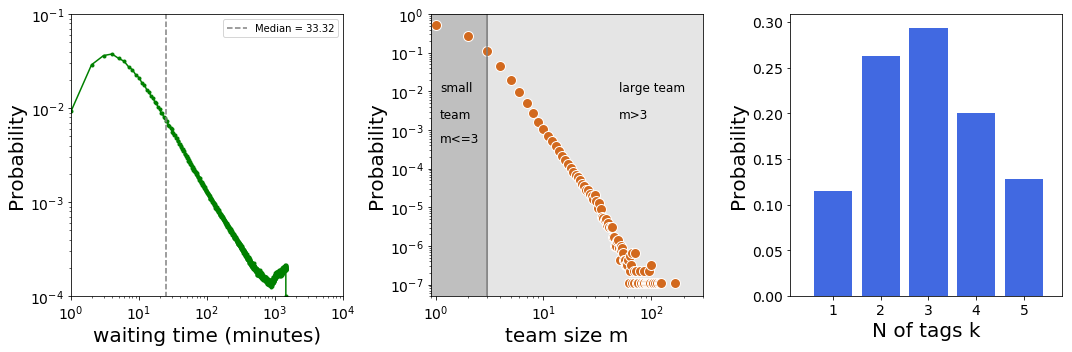

In [121]:
fig = plt.figure(figsize=(15, 5),facecolor='white')
#
ax = fig.add_subplot(131)
plt.plot(xt,yt,'g.-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('waiting time (minutes)',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.plot([24.75,24.75],[0,1],marker='',linestyle='--',color='gray',label='Median = %.2f'%np.median(list(Qwt.values())))
plt.legend(loc=1)
plt.xlim(0,10**4)
plt.ylim(10**-4,0.1)
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.yticks(rotation=45)
#
ax = fig.add_subplot(132)
plt.plot(xm,ym,marker='o',color='chocolate',linestyle='',mec='w',ms=10)
plt.xlabel('team size m',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.fill_between([0.9,3],[0,0],[1,1],color='gray',alpha=0.5)
plt.fill_between([3,1000],[0,0],[1,1],color='gray',alpha=0.2)
plt.plot([3,3],[0,1],marker='',linestyle='-',color='gray')
plt.text(50,0.01,'large team',fontsize=12)
plt.text(50,0.002,'m>3',fontsize=12)
plt.text(1.1,0.01,'small',fontsize=12)
plt.text(1.1,0.002,'team',fontsize=12)
plt.text(1.1,0.0005,'m<=3',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5*10**-7,1)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(0.9,3*10**2)
#
ax = fig.add_subplot(133)
width = 0.8
plt.bar(xx+width/2, yx, width=width,color='RoyalBlue',edgecolor='none')
plt.xticks(xx + width / 2, range(1,6))
plt.xlabel('N of tags k',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.xlim(0.5,6.2)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('./pic/dis.png')

# Num oftags VS distance

# Are larger teams doing better than small teams ?

In [197]:
aTT=defaultdict(lambda:defaultdict(lambda:[])) # #Tags-#TeamSize
bTT=defaultdict(lambda:defaultdict(lambda:0)) # #TeamSize-#Tags
for i in Qtag:
    if i in Qwt and i in M:
        ntags=Qtag[i]
        wt=Qwt[i]
        ts=len(M[i])
        aTT[ntags][ts].append(wt)
        bTT[ts][ntags]+=1

In [204]:
bTT.keys(),aTT.keys()

(dict_keys([13, 58, 34, 5, 7, 21, 6, 9, 8, 2, 22, 4, 3, 11, 10, 15, 16, 17, 1, 28, 18, 19, 33, 12, 23, 14, 20, 25, 26, 29, 64, 44, 32, 75, 39, 30, 24, 108, 27, 61, 96, 31, 45, 46, 47, 36, 35, 37, 118, 42, 41, 43, 48, 49, 40, 85, 57, 81, 38, 52, 120, 95, 53, 59, 124, 55, 86, 72, 67, 100, 62, 74, 66, 51, 50, 71, 98, 73, 60, 54, 165, 56, 65, 63, 114, 84, 101, 78, 89, 91, 69, 70, 93, 80, 104]),
 dict_keys([5, 3, 4, 2, 1, 6]))

In [ ]:
cmp =sns.color_palette("rocket_r", 6)

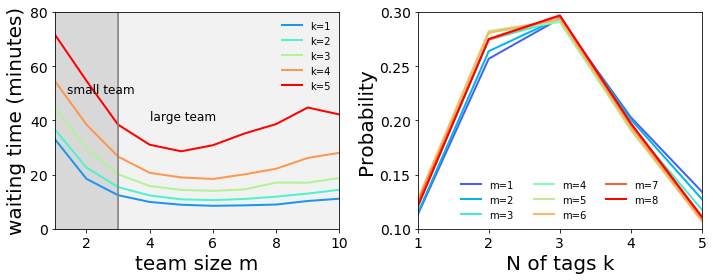

In [203]:
fig = plt.figure(figsize=(10, 4),facecolor='white')
cmap = cm.get_cmap('rainbow',6)

#
ax = fig.add_subplot(121)
for ntags in range(1,6):
    x,y=np.array(sorted([(i,np.median(aTT[ntags][i])) for i in aTT[ntags]])).T
    plt.plot(x,y,color=cmap(ntags),linewidth=2,label='k='+str(ntags))
plt.legend(frameon=False)
plt.xlim(1,10)
plt.ylim(0,80)
plt.fill_between([1,3],[0,0],[80,80],color='gray',alpha=0.3)
plt.fill_between([3,10],[0,0],[80,80],color='gray',alpha=0.1)
plt.plot([3,3],[0,80],marker='',linestyle='-',color='gray')
plt.xlabel('team size m',size=20)
plt.ylabel('waiting time (minutes)',size=20)
plt.text(4,40,'large team',fontsize=12)
plt.text(1.4,50,'small team',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.text(1.1,0.002,'team',fontsize=12)

#
ax = fig.add_subplot(122)
cmap = cm.get_cmap('rainbow',9)
for ts in range(1,9):
    x,y = np.array(sorted(dict(bTT[ts]).items(),key=lambda x:x[0])).T
    y = y/float(y.sum())
    plt.plot(x,y,color=cmap(ts),linewidth=2,label='m='+str(ts))
plt.legend(loc='best',ncol=3,fontsize=10,frameon=False)
plt.xlim(1,5)
plt.ylim(0.1,0.3)
plt.xlabel('N of tags k',size=20)
plt.ylabel('Probability',size=20)
plt.xticks(range(1,6))
plt.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('./pic/diff.png')

In [7]:
#TRUESKILL

#qr: questioner, qt: question time, wa: winning answer, wr: winner, wt: winning time; lr: loser, lt: losing time
QA={}
toremove=set([])
for q in Q: #questioners and winners
    qr,wa,qt,tags = Q[q]
    if wa in A:
        wr,qid,wt = A[wa]
        QA[q]=[(qr,qt),(wr,wt),[]]
        toremove.add(wa)
        
for a in A: #losers
    if a not in toremove:
        lr,qid,lt = A[a]
        if qid in QA:
            QA[qid][2].append((lr,lt))
F=[] #[time, winner, loser]
for q in QA:
    a,b,c = QA[q]
    qr,qt = a
    wr,wt = b
    t = [[qt,q,qr],[wt,wr,q],[wt,wr,qr]]
    if c:
        t += [[lt,wr,lr] for lr,lt in c]
    F += t
F.sort()

# initialize
E = {}
mu = 25.0; sigma = 25.0/3; beta = sigma/2
S = set([i[1] for i in F]+[i[2] for i in F])
for i in S: 
    E[i]=[mu,sigma]
    
# fast version of updating function
def fastupdate(mw,sw,ml,sl,beta): # miu and sigma of winner and loser
    sw2=math.pow(sw,2)
    sl2=math.pow(sl,2)
    t = mw - ml
    c = math.sqrt(34.72222+sw2+sl2)
    c2=math.pow(c,2)
    tc = t/c
    vtc = 0.79788*0.60653**math.pow(tc,2)/math.erfc(-0.70711*tc)
    wtc = vtc*(vtc + tc)
    mw += vtc*sw2/c
    ml -= vtc*sl2/c
    sw *= math.sqrt(1 - wtc*sw2/c2)
    sl *= math.sqrt(1 - wtc*sl2/c2)
    return mw,sw,ml,sl


In [8]:
# update
n=0
start = time.clock()
for i in F:
    n+=1
    if n%1000000 == 0:
        elapsed = (time.clock() - start)
        print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(F),elapsed),end='\r')
    t, winner, loser = i
    mw,sw = E[winner]
    ml,sl = E[loser]
    nmw,nsw,nml,nsl = fastupdate(mw,sw,ml,sl,beta)
    E[winner]=[nmw,nsw]
    E[loser]=[nml,nsl]
print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(F),elapsed),end='\r')    

/home/superman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
US={}
QS={}
for i in E:
    mu,sigma = E[i]
    if i in A:
        US[i]=mu-3*sigma+10
    else:
        QS[i]=mu-3*sigma+10

In [13]:
with open("QS.pkl",'wb')as  f:
    pickle.dump(QS,f)

In [167]:
len(Q),len(A),len(QA),len(F),len(US),len(QS)

(9187228, 26875245, 9126883, 35302647, 1399681, 9800321)

In [168]:
min(list(QS.values())),max(list(QS.values()))

(-1.266048651157254, 52.654933274996274)

In [174]:
b=defaultdict(lambda:defaultdict(lambda:0))
for i in QS:
    if i in Qtag:
        qscore = int(QS[i])
        ntags = Qtag[i]
        b[ntags][qscore]+=1

(0, 0.12)

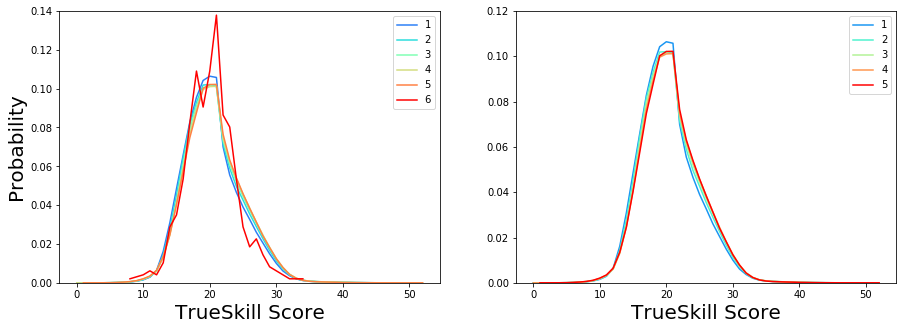

In [205]:
plt.figure(figsize=(15,5))
plt.subplot(121)
cmap = cm.get_cmap('rainbow',len(b)+1)
for i in range(1,len(b)+1):
    x,y=np.array(sorted(dict(b[i]).items(),key=lambda x:x[0])).T
    y=y/float(y.sum())
    plt.plot(x,y,color=cmap(i),label=str(i))
plt.legend()
plt.xlabel("TrueSkill Score",fontsize=20)
plt.ylabel('Probability',size=20)
plt.ylim(0,0.14)

plt.subplot(122)
cmap = cm.get_cmap('rainbow',len(b))
for i in range(1,len(b)):
    x,y=np.array(sorted(dict(b[i]).items(),key=lambda x:x[0])).T
    y=y/float(y.sum())
    plt.plot(x,y,color=cmap(i),label=str(i))
plt.legend()
plt.xlabel("TrueSkill Score",fontsize=20)
plt.ylim(0,0.12)

# Is more concentrated or diverse skills better for answering questions ?

In [11]:
UT=defaultdict(lambda:{})# 回答问题的人的tag分布
Tags=defaultdict(lambda:0)
n=0
start = time.clock()
for i in A:
    n+=1
    if n%1000000 == 0:
        elapsed = (time.clock() - start)
        print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(A),elapsed),end='\r')
    Aauthor,questionID,datetime=A[i]
    if questionID in Q:
        Qauthor,answerID,datetime,tags=Q[questionID]
        for tag in tags:
            Tags[tag]+=1
        if answerID==i:# answer is accepted 
            for tag in tags:
                if tag in UT[Aauthor]:#tag: [m,n] m=total ansers, n=accepated answers
                    UT[Aauthor][tag][0]+=1
                    UT[Aauthor][tag][1]+=1
                else:
                    UT[Aauthor][tag]=[1,1]
        else:# answer is not accepted 
            for tag in tags:
                if tag in UT[Aauthor]:
                    UT[Aauthor][tag][0]+=1
                else:
                    UT[Aauthor][tag]=[1,0]

In [20]:
with open("Tags.pkl",'wb')as f:
    pickle.dump(dict(Tags),f)

In [21]:
UT1 = {user:{t:UT[user][t] for t in UT[user]} for user in UT}

In [22]:
with open("UT.pkl",'wb')as f:
    pickle.dump(UT1,f)


In [212]:
# Tags=defaultdict(lambda:0)
# n=0
# start = time.clock()
# for i in A:
#     n+=1
#     if n%1000000 == 0:
#         elapsed = (time.clock() - start)
#         print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(A),elapsed),end='\r')
#     Aauthor,questionID,datetime=A[i]
#     if questionID in Q:
#         Qauthor,answerID,datetime,tags=Q[questionID]
#         for tag in tags:
#             Tags[tag]+=1

In [23]:
stags=sorted(Tags.items(),key=lambda x:-x[1])
keytags=[tag for tag,s in stags[:50]]
stags

[('javascript', 1899239),
 ('java', 1593568),
 ('c#', 1510671),
 ('php', 1306476),
 ('python', 1165338),
 ('jquery', 1107008),
 ('android', 982727),
 ('html', 940854),
 ('c++', 764471),
 ('css', 697114),
 ('sql', 601397),
 ('mysql', 576031),
 ('ios', 539746),
 ('arrays', 412222),
 ('c', 398141),
 ('.net', 386524),
 ('asp.net', 355323),
 ('objective-c', 324860),
 ('regex', 310816),
 ('sql-server', 304496),
 ('ruby-on-rails', 301424),
 ('iphone', 266420),
 ('r', 262141),
 ('json', 249267),
 ('ruby', 238631),
 ('string', 235398),
 ('angularjs', 207602),
 ('node.js', 196932),
 ('swift', 195732),
 ('asp.net-mvc', 176933),
 ('ajax', 176256),
 ('linux', 175736),
 ('xml', 173416),
 ('django', 169278),
 ('database', 159158),
 ('bash', 150045),
 ('excel', 148607),
 ('wpf', 146532),
 ('list', 132756),
 ('python-3.x', 132328),
 ('algorithm', 129636),
 ('multithreading', 129395),
 ('xcode', 127544),
 ('windows', 122470),
 ('git', 119470),
 ('angular', 117740),
 ('html5', 113644),
 ('vb.net', 113381

In [24]:
UP={}
for user in UT:
    dic=UT[user]
    vs=[]
    for tag in keytags:
        if tag in dic:
            x,y=dic[tag]
            vs.append(y/float(x))
        else:
            vs.append(0)
    UP[user]=vs
    
sample=[]
n=0
start = time.clock()
for i in UP:
    n+=1
    if n%1000000 == 0:
        elapsed = (time.clock() - start)
        print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(UP),elapsed),end='\r')
    if sum(UP[i])>5:
        sample.append(i)
with open("UP.pkl",'wb')as f:
    pickle.dump(UP,f)

In [25]:
len(sample)

88104

In [27]:
Qaer=defaultdict(lambda:[])# 问题对应的回答者，要求问题的tag包含前50的tag
n=0
start = time.clock()
for i in A:
    n+=1
    if n%1000000 == 0:
        elapsed = (time.clock() - start)
        print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(A),elapsed),end='\r')
    Aauthor,questionID,datetime=A[i]
    if questionID in Q:
        Qauthor,answerID,datetime,tags=Q[questionID]
        if set(tags).intersection(keytags):
            Qaer[questionID].append(Aauthor)


In [28]:
with open("Qaer.pkl",'wb')as f:
    pickle.dump({qid:Qaer[qid] for qid in Qaer},f)

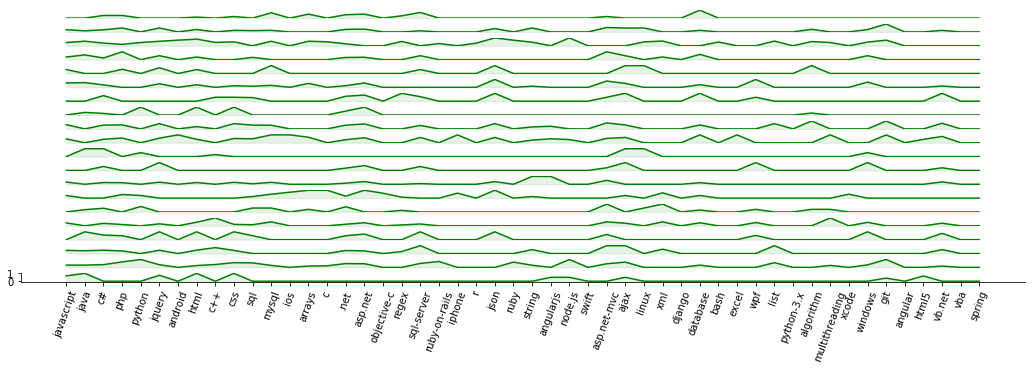

In [29]:
fig = plt.figure(figsize=(18, 5),facecolor='white')
for i in range(1,21):
    ax = fig.add_subplot(20,1,i)
    y=UP[sample[i]]
    ax.plot(y,color='g')
    ax.fill_between(range(len(keytags)),y,0,color='g',alpha=0.1)
    plt.yticks([0,1])
    if i <20:
        ax.axis('off')
        plt.gca().axes.get_xaxis().set_visible(False)
    else:
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xticks(np.arange(len(keytags)))
        ax.set_xticklabels(keytags,fontsize=10,rotation=70)
#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.6)
plt.savefig('./pic/wave.png')

In [62]:
start = time.clock()
if os.path.exists("./fWT1.pkl"):
    with open("cWT.pkl",'rb')as f:
        c = pickle.load(f)
    with open("eAVS.pkl",'rb')as f:
        e = pickle.load(f)
    with open("dTD.pkl",'rb')as f:
        d = pickle.load(f)
    with open("fWT.pkl",'rb')as f:
        cf = pickle.load(f)
else:
    c=defaultdict(lambda:defaultdict(lambda:[]))#
    cf=defaultdict(lambda:[])#
    e=defaultdict(lambda:[])#
    n=0
    for questionID in Qaer:
        n+=1
        if n%100000 == 0:
            elapsed = (time.clock() - start)
            print("===Finish %.2f   TotalTimeCost %.2f==="%(n/len(Qaer),elapsed),end='\r')
        if questionID in Qwt and questionID in Qtag:
            wt=Qwt[questionID]
            ntags=Qtag[questionID]
            ts=len(M[questionID])
            vs=Qaer[questionID]
            AVS=[]
            for i,j in itertools.combinations(vs, 2):
                if i in UP and j in UP:
                    a=np.array(UP[i])
                    b=np.array(UP[j])
                    AVS.append(np.linalg.norm(a-b))
            if AVS:
                dis=int(np.round(np.mean(AVS),1))
                c[ntags][dis].append(wt)
                e[ts].append(np.mean(AVS))
                cf[ntags].append(np.mean(AVS))
    d=defaultdict(lambda:defaultdict(lambda:0))
    n=0
    for ts in e:
        n += 1
        print("%d %d"%(n,len(e)),end='\r')
        for di in e[ts]:
            d[ts][np.round(di,1)]+=1
    with open("cWT.pkl",'wb')as f:
        pickle.dump(dict({i:dict(c[i]) for i in c}),f)
    with open("eAVS.pkl",'wb')as f:
        pickle.dump(dict(e),f)
    with open("cfWT.pkl",'wb')as f:
        pickle.dump(dict(cf),f)
    with open("dTD.pkl",'wb')as f:
        pickle.dump(dict({i:dict(d[i]) for i in d}),f)
print("===Finish %.2f   TotalTimeCost %.2f==="%(len(Qaer),elapsed),end='\r')

In [64]:
cn =[cf[i] for i in range(1,7)]

Text(0,0.5,'Distance')

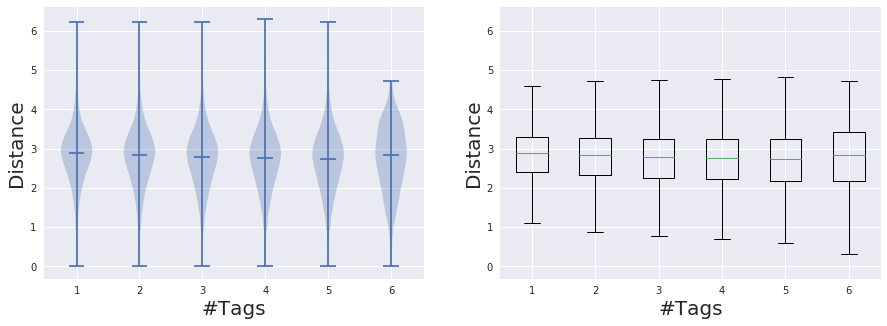

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.violinplot(cn,showmeans=False,showmedians=True)
plt.xlabel("#Tags",fontsize=20)
plt.ylabel("Distance",fontsize=20)
plt.subplot(122)
plt.boxplot(cn)
plt.xlabel("#Tags",fontsize=20)
plt.ylabel("Distance",fontsize=20)

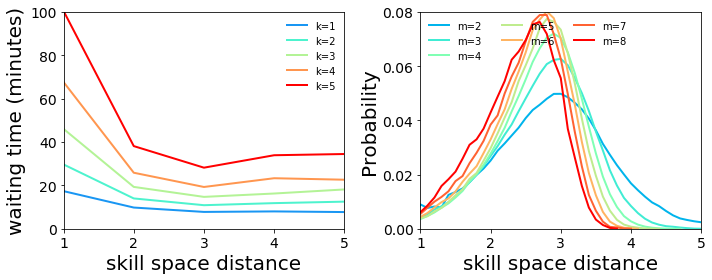

In [245]:
fig = plt.figure(figsize=(10, 4),facecolor='white')
#
ax = fig.add_subplot(122)
cmap = cm.get_cmap('rainbow',9)
for ts in range(2,9):
    x,y=np.array(sorted(d[ts].items())).T
    y=y/float(y.sum())
    plt.plot(x,y,color=cmap(ts),linewidth=2,label='m='+str(ts))
plt.legend(loc=2,ncol=3,fontsize=10,frameon=False)
plt.xlim(1,5)
plt.ylim(0,0.08)
plt.xlabel('skill space distance',size=20)
plt.ylabel('Probability',size=20)
plt.xticks(range(1,6))

ax.tick_params(axis='both', which='major', labelsize=14)
#
ax = fig.add_subplot(121)
cmap = cm.get_cmap('rainbow',6)
for ntags in range(1,6):
    x,y=np.array(sorted([(i,np.median(c[ntags][i])) for i in c[ntags]])).T
    plt.plot(x,y,color=cmap(ntags),linewidth=2,label='k='+str(ntags))
plt.legend(frameon=False)
plt.xlim(1,5)
plt.ylim(0,100)
plt.xticks(range(1,6))
plt.xlabel('skill space distance',size=20)
plt.ylabel('waiting time (minutes)',size=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('./pic/skilldis.png')

In [ ]:
# 困难的问题是不死